<a href="https://colab.research.google.com/github/juangiacobbe15/bisection_method/blob/main/bisection_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bisection Method

 The bisection method is a root-finding method that applies to any continuous function for which one knows two values with opposite signs. The method consists of repeatedly bisecting the interval defined by these values and then selecting the subinterval in which the function changes sign, and therefore must contain a root. It is a very simple and robust method, but it is also relatively slow. Because of this, it is often used to obtain a rough approximation to a solution which is then used as a starting point for more rapidly converging methods.

 The method is applicable for numerically solving the equation $f(x) = 0$ for the real variable $x$, where f is a continuous function defined on an interval $[a, b]$ and where $f(a)$ and $f(b)$ have opposite signs. In this case a and b are said to bracket a root since, by the intermediate value theorem, the continuous function f must have at least one root in the interval$ (a, b)$.

At each step the method divides the interval in two parts/halves by computing the midpoint $p = \frac{a +b }{2}$ of the interval and the value of the function $f(c)$ at that point. If c itself is a root then the process has succeeded and stops. Otherwise, there are now only two possibilities: either $f(a)$ and $f(c)$ have opposite signs and bracket a root, or $f(c)$ and $f(b)$ have opposite signs and bracket a root. The method selects the subinterval that is guaranteed to be a bracket as the new interval to be used in the next step. In this way an interval that contains a zero of f is reduced in width by 50% at each step. The process is continued until the interval is sufficiently small.

Let's import the libraries that we are going to use

In [2]:
import math
import pandas as pd
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import scipy
import random

In [3]:
pd.set_option("display.precision", 16)

### Implementation in Python

Now, let's look at the implementation of the method. We begin by defining a function f that has a change of sign in an interval of interest. For example, let's use the following function

$$\displaystyle\ f(x) = 2^x + 8^x - 23$$

Then we declare the function f

In [5]:
def f(x):
  return 2**x + 8**x - 23

##Function graph

Let's look at the graph of f and define the interval over which we will do the iterations of the method

In [6]:
x = np.linspace(-5, 5, 1000)
y = f(x)

I define useful functions to optimize and modularize the creation of graphics

In [7]:
def configure_graph_grid(grid_min, grid_max):
    """Set up a square grid axis"""

    # Make it square and set limits
    plt.axis('square')
    plt.axis(( grid_min, grid_max, grid_min, grid_max))

In [8]:
def set_ticks(axes, min_val, max_val, tick_size=1):
    """Sets the granularity of the boxes.  Default is 1"""
    ticks = [x for x in range(min_val, max_val, tick_size)]
    axes.set_xticks(ticks)
    axes.set_yticks(ticks)

In [9]:
def plot_axes(grid_min, grid_max):
    """Plot x and y axes, x first then y"""
    plt.plot([grid_min, grid_max], [0,0] , color=".3")
    plt.plot([0,0],[grid_min, grid_max],  color=".3")
    plt.grid()

Having these useful functions, we proceed to graph the function.

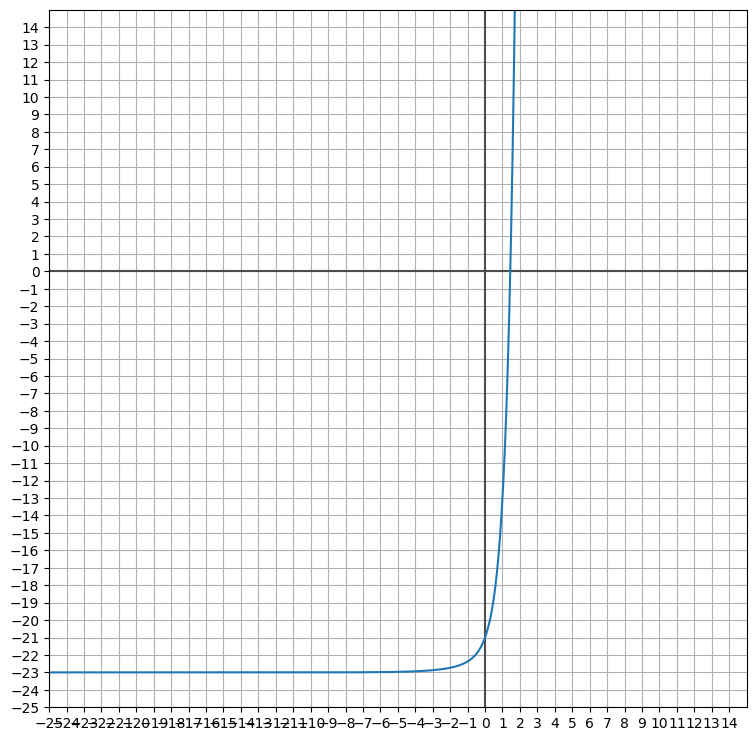

In [11]:
x_array = np.linspace(-25, 5, 1000)
y_array = np.array([f(x) for x in x_array])
min_val, max_val = -25, 15
fig, axes = plt.subplots(figsize=(9, 11))
configure_graph_grid(min_val, max_val)
plot_axes(min_val, max_val)
set_ticks(axes, min_val, max_val)
line = plt.plot(x_array, y_array)

We note that the root we are looking for is between $x = 1$ and $x = 2$, so we are going to consider the interval $I = (1, 2)$ when using the root search methods.

On the other hand, we see in the graph that the function is going to be continuous in its domain, in particular, the interval I. We could already know this in advance, since it is a composition of exponential functions and a constant.

In [12]:
f1 = f(1)
f2 = f(2)

print('f(1) =', f1)
print('f(2) =', f2)

f(1) = -13
f(2) = 45


We see that there is finally a change of sign in the function within the interval, so, according to Bolzano's theorem, we end up concluding that there is a root within it.



## Implementation

Now, let's start with the algorithm. First we need to have a function that calculates the midpoint between two points, and then use it to perform the bisection iterations.

In [15]:
def midpoint(a, b):
  return (a + b) / 2

We will use a function that gives us the maximum number of iterations we need for the bisection.

In [16]:
def maximum_quantity_iterations_bisection(a, b, tolerance):
  return math.ceil((math.log10(b - a) - math.log10(tolerance))/math.log10(2))

Also, we added a function that is responsible for adding a series of data to the results table, which we will display after approximating the root by bisection.

In [19]:
def add_data_to_table(table, a, b, p, error):
  table['Extreme 1'].append(a)
  table['Extreme 2'].append(b)
  table['Midpoint'].append(p)
  table['Difference between successive iterations'].append(error)

Ahora, usemos estas funciones útiles para crear nuestro algoritmo de bisección.

In [20]:
def bisection_method(f, extreme_1, extreme_2, error):
  table = { 'Extreme 1': [], 'Extreme 2': [], 'Midpoint': [], 'Difference between successive iterations': []}

  p = midpoint(extreme_1, extreme_2)
  maximum_iterations = maximum_quantity_iterations_bisection(extreme_1, extreme_2, error)
  i = 0

  add_data_to_table(table, extreme_1, extreme_2, p, '----')

  while((abs(extreme_2 - extreme_1) >= error) and (i <= maximum_iterations)):
    i += 1
    if(f(extreme_1) * f(p) < 0):
      extreme_2 = p
      p = midpoint(extreme_1, extreme_2)
      add_data_to_table(table, extreme_1, extreme_2, p, abs(extreme_2 - extreme_1))

    if(f(extreme_2) * f(p) < 0):
      extreme_1 = p
      p = midpoint(extreme_1, extreme_2)
      add_data_to_table(table, extreme_1, extreme_2, p, abs(extreme_2 - extreme_1))

  df = pd.DataFrame(data=table)
  return df

Now, having all our functions declared, let's approximate the root of the function we are analyzing with bisection.

Let's start approximating with a tolerance of, for example 1e-05.

The bisection method with the aforementioned dimension had more than 15 iterations, so we will show the first 5 and the last 5 iterations.

In [22]:
extreme_1 = 1
extreme_2 = 2

tolerance = 1e-05

df_bisection = bisection_method(f, extreme_1, extreme_2, tolerance)
df_bisection.head()

,Extreme 1,Extreme 2,Midpoint,Difference between successive iterations
0,1.0000,2.0,1.50000,----
1,1.0000,1.5,1.25000,0.5
2,1.2500,1.5,1.37500,0.25
3,1.3750,1.5,1.43750,0.125
4,1.4375,1.5,1.46875,0.0625


In [23]:
df_bisection.tail()

,Extreme 1,Extreme 2,Midpoint,Difference between successive iterations
13,1.4471435546875000,1.447265625000000,1.4472045898437500,0.0001220703125
14,1.4471435546875000,1.447204589843750,1.4471740722656250,0.00006103515625
15,1.4471435546875000,1.447174072265625,1.4471588134765625,0.000030517578125
16,1.4471588134765625,1.447174072265625,1.4471664428710938,0.0000152587890625
17,1.4471664428710938,1.447174072265625,1.4471702575683594,0.0000076293945312


As a conclusion we see that the root will have an approximate value (considering the error committed in the method) of
$$x = 1.44717 \pm 1x10^{-5}$$